In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white")

# Independence Simulations

This module contains a benchmark of 20 simulations of various dependency structures to allow benchmark comparisons between included tests. It also can be used to see when to use which test if some information about the shape of the data distribution is already known. 

Importing simulations from `hyppo` is easy! All simulations are contained withing the `hyppo.sims` module and can be imported like all other Python packages. In this tutorial, we will show you what all of the independence simulations look like and as such import all of them.

In [2]:
from hyppo.sims import (linear, exponential, cubic, joint_normal, step,
                      quadratic, w_shaped, spiral, uncorrelated_bernoulli, logarithmic,
                      fourth_root, sin_four_pi, sin_sixteen_pi, square, two_parabolas,
                      circle, ellipse, diamond, multiplicative_noise, multimodal_independence)

These are some constants that are used in this notebook. If running these notebook, please only manipulate these constants.

In [3]:
# number of sample for noisy and not noisy simulations
NOISY = 100
NO_NOISE = 1000

# list containing simulations and plot titles
simulations = [
    (linear, "Linear"),
    (exponential, "Exponential"),
    (cubic, "Cubic"),
    (joint_normal, "Joint Normal"),
    (step, "Step"),
    (quadratic, "Quadratic"),
    (w_shaped, "W-Shaped"),
    (spiral, "Spiral"),
    (uncorrelated_bernoulli, "Uncorrelated Bernoulli"),
    (logarithmic, "Logarithmic"),
    (fourth_root, "Fourth Root"),
    (sin_four_pi, "Sine 4\u03C0"),
    (sin_sixteen_pi, "Sine 16\u03C0"),
    (square, "Square"),
    (two_parabolas, "Two Parabolas"),
    (circle, "Circle"),
    (ellipse, "Ellipse"),
    (diamond, "Diamond"),
    (multiplicative_noise, "Multiplicative"),
    (multimodal_independence, "Independence")
]

The following code plots the simulation with noise where applicable in blue overlayed with the simulation with no noise in red. For specific equations for a simulation, please refer to the documentation corresponding to the desired simulation.

In [4]:
def plot_sims():
    # set the figure size
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(28,24))
    
    count = 0
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            count = 5*i + j
            sim, sim_title = simulations[count]
            
            # the multiplicative noise and independence simulation don't have a noise parameter
            if sim_title == "Multiplicative" or sim_title == "Independence":
                x, y = sim(NO_NOISE, 1)
                x_no_noise, y_no_noise = x, y
            else:
                x, y = sim(NOISY, 1, noise=True)
                x_no_noise, y_no_noise = sim(NO_NOISE, 1)

            col.scatter(x, y, c='b', label="noise", alpha=0.5)
            col.scatter(x_no_noise, y_no_noise, c='r', label="no noise")
            
            # make the plot look pretty
            col.set_title('{}. {}'.format(count+1, sim_title), fontsize=35)
            col.set_xticks([])
            col.set_yticks([])
            if count == 16:
                col.set_ylim([-1, 1])
            sns.despine(left=True, bottom=True, right=True)
                
    leg = plt.legend(bbox_to_anchor=(0.5, 0.1), bbox_transform=plt.gcf().transFigure,
                     ncol=5, loc='upper center')
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.subplots_adjust(hspace=.75)

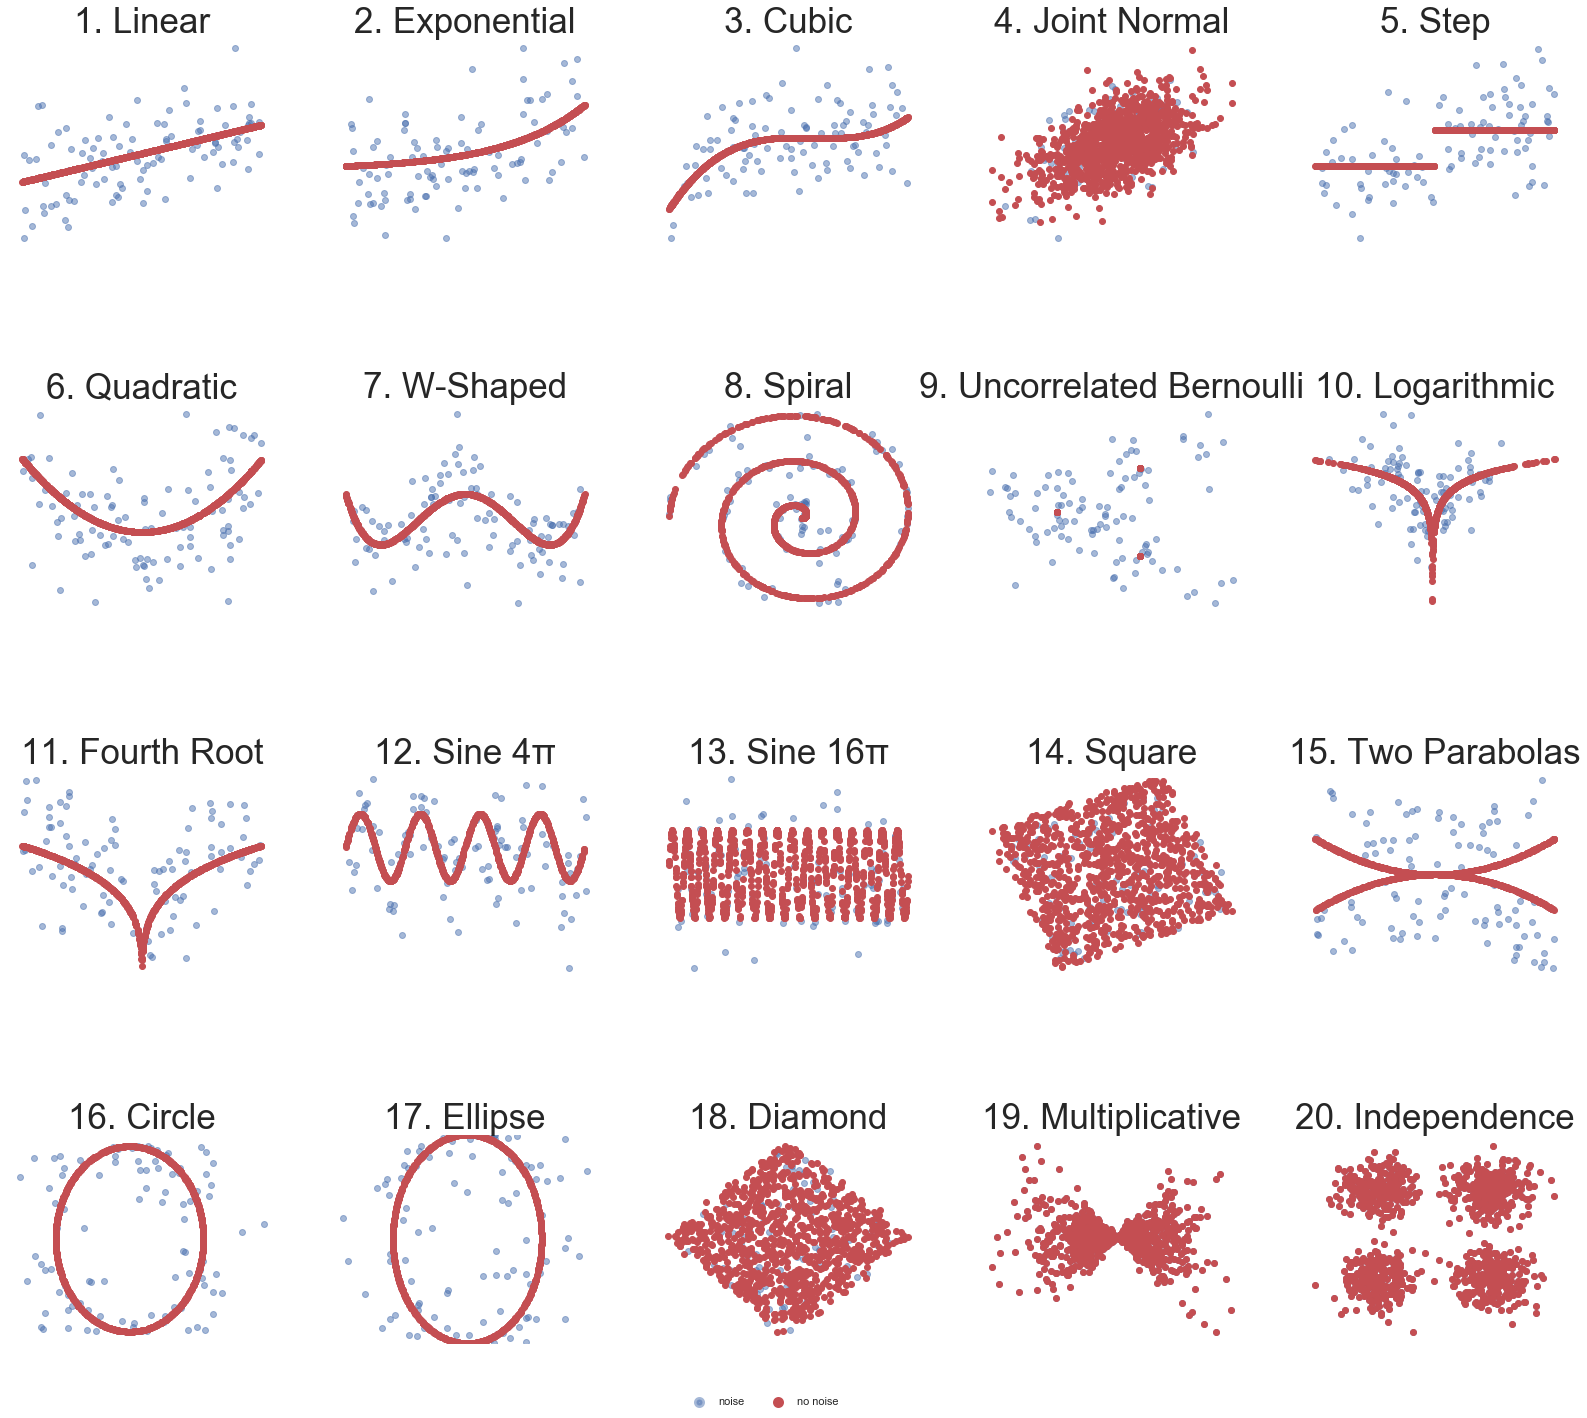

In [5]:
plot_sims()